In [7]:
import tensorflow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', 200)
sns.set(style='whitegrid')

In [8]:
from tensorflow.keras.datasets import cifar10

In [11]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [10]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
x_train[0].shape

(32, 32, 3)

In [17]:
# plt.imshow(x_train[0])
# plt.show()

In [18]:
x_train = x_train / 255

In [19]:
x_test = x_test / 255

In [20]:
x_test.shape

(10000, 32, 32, 3)

In [21]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
y_train_cat = to_categorical(y_train)

In [24]:
y_test_cat = to_categorical(y_test)

In [25]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

In [45]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), input_shape=(32,32,3), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), input_shape=(32,32,3), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
early_stopping = EarlyStopping(monitor='loss', patience=2, verbose=1)

In [49]:
model.fit(x=x_train, y=y_train_cat, epochs=15, validation_data=(x_test, y_test_cat), callbacks=[early_stopping])

Epoch 1/15
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4913 - accuracy: 0.4632 - val_loss: 1.2216 - val_accuracy: 0.5710
Epoch 2/15
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1575 - accuracy: 0.5906 - val_loss: 1.1648 - val_accuracy: 0.5901
Epoch 3/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9946 - accuracy: 0.6537 - val_loss: 1.0742 - val_accuracy: 0.6272
Epoch 4/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8767 - accuracy: 0.6942 - val_loss: 0.9590 - val_accuracy: 0.6670
Epoch 5/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7839 - accuracy: 0.7266 - val_loss: 0.9619 - val_accuracy: 0.6704
Epoch 6/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7001 - accuracy: 0.7546 - val_loss: 0.9478 - val_accuracy: 0.6860
Epoch 7/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6246 - accuracy: 0.7823 - val_loss: 0.9641 -

In [50]:
metrics = pd.DataFrame(model.history.history)

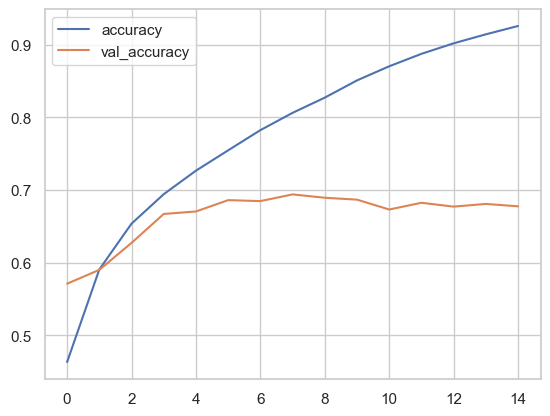

In [51]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.show()

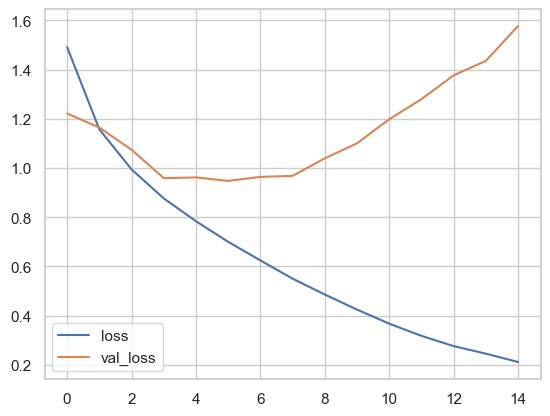

In [52]:
metrics[['loss', 'val_loss']].plot()
plt.show()

In [54]:
model.evaluate(x_train, y_train_cat)

1563/1563 [==============================] - 10s 6ms/step - loss: 0.1521 - accuracy: 0.9496


[0.15213631093502045, 0.9496399760246277]

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
predictions = np.argmax((model.predict(x_test) > 0.5).astype('int32'), axis=1)

313/313 [==============================] - 2s 6ms/step


In [58]:
predictions

array([3, 1, 0, ..., 7, 4, 7], dtype=int64)

In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.73      0.60      1000
           1       0.80      0.80      0.80      1000
           2       0.63      0.51      0.56      1000
           3       0.50      0.48      0.49      1000
           4       0.67      0.57      0.61      1000
           5       0.61      0.53      0.57      1000
           6       0.82      0.70      0.76      1000
           7       0.70      0.74      0.72      1000
           8       0.79      0.79      0.79      1000
           9       0.70      0.81      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



In [61]:
print(confusion_matrix(y_test, predictions))

[[728  29  49  11  16   6   8  14  83  56]
 [ 40 797   3   4   6   2   7   8  26 107]
 [131  13 512  86  63  59  47  43  22  24]
 [108  17  44 484  53 154  31  52  19  38]
 [107   7  64  58 570  43  30  90  17  14]
 [ 90   8  49 170  47 531  14  64   6  21]
 [ 77   8  50  77  28  21 697  16  10  16]
 [ 46   8  28  44  54  43   6 744   6  21]
 [ 74  38   9  14  11   9   1   7 794  43]
 [ 41  77   6  12   7   2   4  18  25 808]]


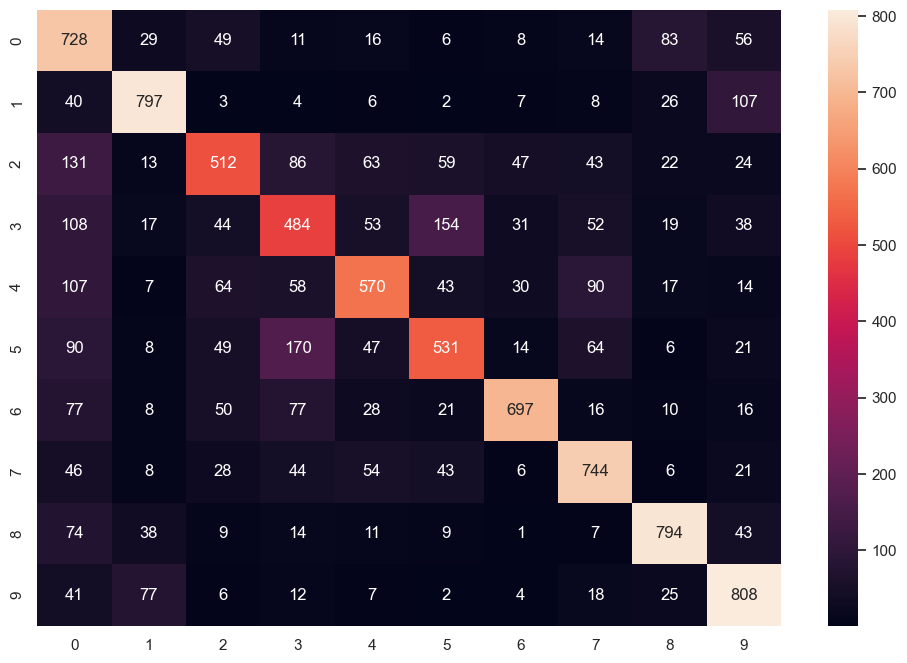

In [69]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d')
plt.show()

In [70]:
my_image = x_test[0]

In [74]:
sing_pred = np.argmax(model.predict(my_image.reshape(1,32,32,3)) > 0.5, axis=1)

1/1 [==============================] - 0s 34ms/step


In [75]:
sing_pred

array([3], dtype=int64)

In [76]:
y_test[0]

array([3], dtype=uint8)

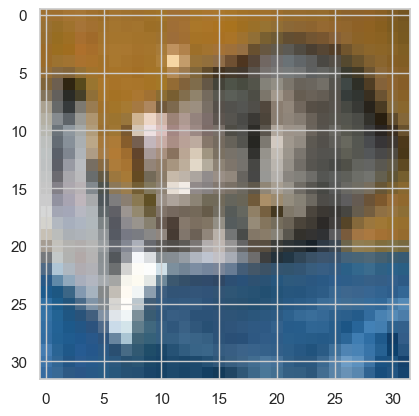

In [78]:
plt.imshow(my_image)
plt.show()

In [79]:
my_image = x_test[16]

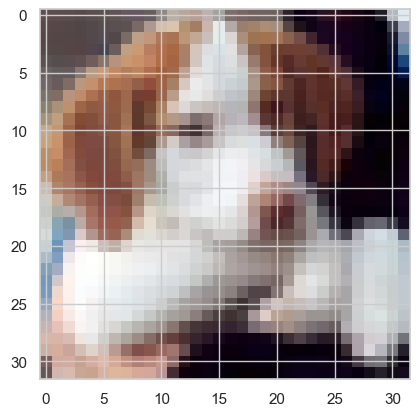

In [80]:
plt.imshow(my_image)
plt.show()

In [81]:
sing_pred = np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis=1)

1/1 [==============================] - 0s 48ms/step


In [82]:
sing_pred

array([5], dtype=int64)

In [87]:
y_test[16]

array([5], dtype=uint8)